<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/timaslj_lab7/timaslj_lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab 7: Optimization and learning**
**Timas Ljungdahl**

# **Abstract**

In this report, two methods for finding local minimums of scalar valued functions were implemented and tested for accuracy and error convergence; gradient descent method and Newtons method. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import unittest
import random
import math

from sympy import * 

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

The goal of optimization is to minimize a problem by finding $x^* \in R^n$ such that $f(x^*) \leq f(x), \forall x \in D$ where $D$ is the search space. In this lab we assume that $D = R^n$, meaning that the minimization problems are unconstrained. 

##### **Gradient descent method**

The gradient descent method seeks to iteratively move closer to $x^*$ by steping in the gradient descent direction for a particular choice of step length and repeating the procedure for the newly aquired $x$. 

$$
    x^{(k+1)} = x^{(k)} - \alpha^{(k)} \nabla f(x^{(k)})
$$

We continue updating $x^k$ until $||\nabla f(x^k)|| \leq TOL||$ for some small tolerance value. 

##### **Newton's method for optimization**

Newton's method is a method for itereratively finding roots of a function. In optimization it is used for finding the roots of $f\prime(x)$, meaning that it finds the solutions to $f\prime(x) = 0$, which gives us the stationary points of $f(x)$. 

For Newton's method we solve the following equation for $\Delta x^{(k)}$: 

$$
    Hf(x^{(k)}) \Delta x^{(k)} = - \nabla f(x^{(k)})
$$
and update $x$ as following in each iteration:
$$
    x^{(k+1)} = x^{(k)} + \Delta x^{(k)}
$$

$Hf(x^{(k)})$ is the Hessian matrix evaluated in the point $x^{(k)}$. The Hessian matrix is a square matrix of second-order partial derivatives which describe the local curvature of the function, which can be defined by the following equation using indices i and j: 

$$
    H _{i,j}={\frac {\partial ^{2}f}{\partial x_{i}\partial x_{j}}}.
$$

#### **Calculating finite difference for Hessian and gradient**
To calculate the gradient of a function in a point $x$ I used central difference in order to approximate the partial derivatives, which is given by:

$$
    \delta_h[f](x) = f(x + 1/2h) - f(x - 1/2h)
$$

To calculate the Hessian of a function in a point $x$ I used central difference in order to approximate the second order partial derivatives in several variables which is given by: 

$$
    f_{xx}(x,y) \approx \frac{f(x + h, y) - 2f(x,y) + f(x-h,y)}{h^2} \\
    f_{xy}(x,y) \approx \frac{f(x + h, y+k) - f(x+h,y-k) - f(x-h,y+k) + f(x-h,y-k}{4hk}
$$



# **Methods**

The algorithms were implemented following the lecture notes. The error convergence was plotted for both methods. For both methods $TOL$ was set to $0.0001$. Although the methods are generalized for $R^n$, I tested the methods for a function of two variables where the global minimum was known. The function in this case was $f(x,y) = x^2 + y^4 - 5y^3$ with global minimum $x^* = [0, 15/4]$.  

# **Results**

### **Gradient and Hessian in $R^n$**

In [0]:
def gradient(f, x):
    h = 1e-4
    gradient = np.zeros(x.size)
    for i in range(gradient.size):
        x_temp1, x_temp2 = np.array(x, dtype="float"), np.array(x, dtype="float")
        x_temp1[i] = x[i]+h
        x_temp2[i] = x[i]-h
        gradient[i] = (f(x_temp1)-f(x_temp2)) / (2*h)
    return gradient

def hessian(f, x):
    h = 1e-4
    hessian = np.zeros((x.size, x.size)) 
    
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[1]):
            x_temp1, x_temp2, x_temp3, x_temp4 = (
                                            np.array(x, dtype="float"), 
                                            np.array(x, dtype="float"), 
                                            np.array(x, dtype="float"), 
                                            np.array(x, dtype="float") 
                                          )
            
            if not i == j:
                x_temp1[i] = x[i]+h
                x_temp1[j] = x[j]+h

                x_temp2[i] = x[i]+h
                x_temp2[j] = x[j]-h

                x_temp3[i] = x[i]-h
                x_temp3[j] = x[j]+h

                x_temp4[i] = x[i]-h
                x_temp4[j] = x[j]-h

                hessian[i,j] = (f(x_temp1) - f(x_temp2) - f(x_temp3) + f(x_temp4))/(4*h**2)
            else:
                x_temp1[i] = x[i]+h
                x_temp2[i] = x[i]-h
                hessian[i,j] = (f(x_temp1) - 2*f(x) + f(x_temp2)) / h**2

    return hessian

### **Gradient descent method in $R^n$**

[-4.95227187e-05  3.75000000e+00]


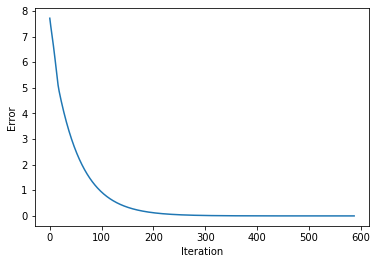

In [0]:
def gradient_descent_method(f, x_start, TOL=1e-4):
    xs = [x_start.copy()]
    x_k = x_start
    alpha_k = 1e-2  # Step size multiplier
    while np.linalg.norm(gradient(f, x_k)) > TOL:
        x_k -= alpha_k * gradient(f, x_k)
        xs += [x_k.copy()]
    return xs

f = lambda x: x[0]**2 + x[1]**4 - 5*x[1]**3
x_start = np.array([-7,7], dtype="float")
exact = np.array([0, 15/4], dtype="float")
xs = gradient_descent_method(f, x_start)
print(xs[-1])
errors = [np.linalg.norm(exact - x) for x in xs]

plt.plot(np.arange(0, len(xs), 1), errors)
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.show()

### **Newton's method in $R^n$**


[-5.94463239e-12  3.75000000e+00]


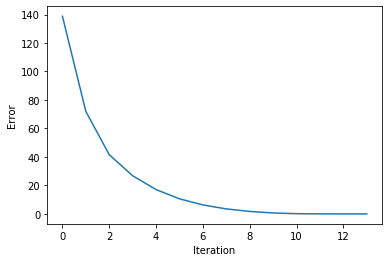

In [0]:
def newtons_method(f, x_start, TOL=1e-4):
    xs = [x_start.copy()]
    x_k = x_start
    while np.linalg.norm(gradient(f, x_k)) > TOL:
        A = hessian(f, x_k)
        b = -gradient(f,x_k)
        x = np.linalg.solve(A, b)
        
        x_k += x
        xs += [x_k.copy()]
    return xs

f = lambda x: x[0]**2 + x[1]**4 - 5*x[1]**3
x_start = np.array([-100,100], dtype="float")
exact = np.array([0, 15/4], dtype="float")
xs = newtons_method(f, x_start)
errors = [np.linalg.norm(exact - x) for x in xs]
print(xs[-1])

plt.plot(np.arange(0, len(xs), 1), errors)
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.show()

# **Discussion**

For both methods we can see that the error follows a second order convergence and that both methods find the local minimum $x^* = [0, 15/4]$. We can also see that Newton's method converges much quicker as it takes larger steps per iteration. In the gradient case this step size is a constant

$$
    \alpha = 0.01
$$

which is very small. To optimize the gradient descent method one could implement a line search method, such as backtracking line search, in order to approximate an optimal step length for each iteration. However, this is left for further studies.